## Problem 3: Multiple Regression

Extend your simple Bayesian regression model from the previous exercise into a multiple regression model:

\begin{aligned}
\sigma &\sim \text{Inv-Gamma}(\tau_0, \tau_1) \\
\alpha &\sim \text{Normal}(0, \sigma_\alpha) \\
\beta &\sim \text{Multivariate-Normal}(0, \sigma_\beta \mathbb{I}) \\
y_n &\sim \text{Normal}(\alpha + \beta x_n^T, \sigma) \quad \text{for } n = 1, \dots, N,
\end{aligned}

where you need to set the hyperparameters of the prior (i.e., $\tau_0, \tau_1, \sigma_\beta, \sigma_\alpha$) to some reasonable values. Next, use your **Stan** program to fit a Bayesian multiple regression model for the Insurance Costs data set: **data/insurance.csv**

Your goal is to predict the insurance charges (**charges**) from a patient’s BMI (**bmi**), age (**age**), and number of children (**children**). Thus, you need to estimate three regression weights ($\beta_1, \beta_2, \beta_3$), along with the intercept ($\alpha$), and the noise parameter ($\sigma$). It is also recommended that you standardize your predictors (i.e., subtract the means from the input variables and divide by their standard deviations) in order to bring them to a common scale.

Split the data into a training set and a test set and fit the model only to the training set. Perform the usual convergence checks and describe your results. **Which of the three variables is the best predictor of Insurance Charges?**

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### 1. Load and Preprocess Data

In [16]:
# Load dataset
df = pd.read_csv("data/insurance.csv")

# Select predictors and target
X = df[['bmi', 'age', 'children']]
y = df['charges']

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### 2. Fit the model

In [17]:
# Fit Bayesian Ridge Regression
model = BayesianRidge()
model.fit(X_train, y_train)

# Print Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:")
for name, coef in zip(['bmi', 'age', 'children'], model.coef_):
    print(f"  {name}: {coef:.4f}")

Intercept: 13340.29309709148
Coefficients:
  bmi: 1981.2217
  age: 3027.9228
  children: 665.6273


### 3. Evaluate on Test Set

In [18]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTest Set MSE: {mse:.2f}")
print(f"Test Set R² Score: {r2:.2f}")


Test Set MSE: 131415144.40
Test Set R² Score: 0.15


### 4. Visualize Predictions vs Actual

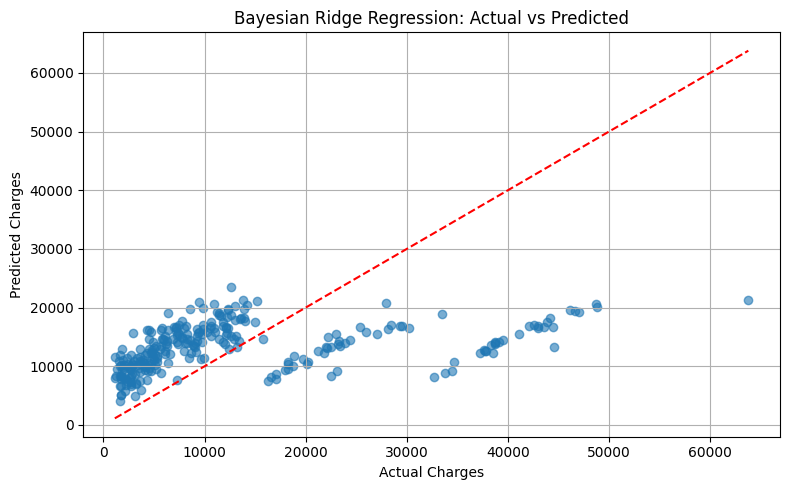

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Bayesian Ridge Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

Bayesian Ridge Regression in scikit-learn is a faster, simpler method that uses an approximate approach to estimate the model. It assumes fixed, standard priors and finds the best parameters by maximizing likelihood, rather than sampling.

In contrast, the custom Bayesian model uses full sampling to estimate the entire range of possible parameter values. This gives more flexibility and a deeper understanding of uncertainty, but it takes longer to run and is more complex to set up.

As a result, while the custom model offers more precise and comprehensive uncertainty quantification and modeling flexibility, the Bayesian Ridge implementation in scikit-learn is faster and easier to use for standard regression problems.